## WeGo Data Introduction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium import Element
import seaborn as sns

In [2]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [4]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

In the data, the bus route can be identified by its ROUTE_ABBR value.  
**3:** West End  
**7:** Hillsboro  
**22:** Bordeaux  
**23:** Dickerson Pike  
**50:** Charlotte Pike  
**52:** Nolensville Pike  
**55:** Murfreesboro Pike  
**56:** Gallatin Pike

In [8]:
wego['ROUTE_ABBR'].value_counts().sort_index()

ROUTE_ABBR
3     47162
7     18026
22    25959
23    42108
50    43291
52    51819
55    61944
56    60020
Name: count, dtype: int64

The trip can be identified by the DATE/CALENDAR_ID plus the TRIP_ID.  
**Warning:** The TRIP_ID refers to the route and time but will be used across multiple days.

The data contains multiple **time points** for each trip. There are more stops along the route than time points, but the time points are the points with specific scheduled times the bus operators must adhere to.

The first stop of a trip has a TRIP_EDGE of 1, the last has a TRIP_EDGE of 2, and the intermediate stops are TRIP_EDGE 0. 

Here is the first trip in the dataset. It was a Bordeaux route (Route 22), scheduled to start at 4:42:00 and end at 5:10:00.

In [11]:
wego[['DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'SCHEDULED_TIME']].loc[:3]

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00


Note that the same TRIP_ID appears on the following day.

In [14]:
(
    wego
    .loc[wego['DATE'].astype(str).isin(['2023-08-01', '2023-08-02'])]
    .loc[wego['TRIP_ID'] == 345104]
    [['DATE', 'ROUTE_ABBR', 'TRIP_ID', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'ROUTE_DIRECTION_NAME', 'SCHEDULED_TIME', 'ROUTE_STOP_SEQUENCE']]
)

,DATE,ROUTE_ABBR,TRIP_ID,TIME_POINT_ABBR,TRIP_EDGE,ROUTE_DIRECTION_NAME,SCHEDULED_TIME,ROUTE_STOP_SEQUENCE
0,2023-08-01,22,345104,MHSP,1,TO DOWNTOWN,2023-08-01 04:42:00,14.0
1,2023-08-01,22,345104,ELIZ,0,TO DOWNTOWN,2023-08-01 04:46:00,10.0
2,2023-08-01,22,345104,CV23,0,TO DOWNTOWN,2023-08-01 04:54:00,5.0
3,2023-08-01,22,345104,MCC5_10,2,TO DOWNTOWN,2023-08-01 05:10:00,1.0
6461,2023-08-02,22,345104,MHSP,1,TO DOWNTOWN,2023-08-02 04:42:00,14.0
6462,2023-08-02,22,345104,ELIZ,0,TO DOWNTOWN,2023-08-02 04:46:00,10.0
6463,2023-08-02,22,345104,CV23,0,TO DOWNTOWN,2023-08-02 04:54:00,5.0
6464,2023-08-02,22,345104,MCC5_10,2,TO DOWNTOWN,2023-08-02 05:10:00,1.0


**Adherence** refers to the difference between scheduled time and the actual time that the bus departs from a stop.

A negative value for ADHERENCE indicates that the bus is late, and a positive indicates that the bus is early.

Generally, an adherence value less than -6 is considered late, and greater than 1 is considered early, but there are some exceptions. For example, a positive adherence for the end of a trip (TRIP_EDGE 2) is not considered early, since it is not a problem if a bus ends its trip early as long as it didn't pass other timepoints early along the way. You can check whether a trip was considered on-time, early, or late using the ADJUSTED_EARLY_COUNT, ADJUSTED_LATE_COUNT, and ADJUSTED_ONTIME_COUNT columns.

Here is an example of a trip where all time points would be considered to be on time. Notice that at the end of the trip, the bus was more than 6 minutes early, but was still counted as on-time since this was a trip edge of 2.

In [17]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[:3]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00,2023-08-01 04:44:08,-2.133333,0,0,1
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00,2023-08-01 04:48:27,-2.450000,0,0,1
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00,2023-08-01 04:54:56,-0.933333,0,0,1
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00,2023-08-01 05:03:43,6.283333,0,0,1


And one that has one late stop.

In [20]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[77:79]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
77,2023-08-01,120230801,345127,22,MHSP,1,2023-08-01 17:05:00,2023-08-01 17:08:21,-3.350000,0,0,1
78,2023-08-01,120230801,345127,22,CV23,0,2023-08-01 17:14:00,2023-08-01 17:20:10,-6.166666,0,1,0
79,2023-08-01,120230801,345127,22,MCC5_10,2,2023-08-01 17:30:00,2023-08-01 17:30:23,-0.383333,0,0,1


And one which was early.

In [23]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[11:13]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
11,2023-08-01,120230801,345107,22,MCC5_10,1,2023-08-01 06:15:00,2023-08-01 06:16:19,-1.316666,0,0,1
12,2023-08-01,120230801,345107,22,CV23,0,2023-08-01 06:25:00,2023-08-01 06:23:30,1.500000,1,0,0
13,2023-08-01,120230801,345107,22,MHSP,2,2023-08-01 06:35:00,2023-08-01 06:30:59,4.016666,0,0,1


**Headway** is the amount of time between a bus and the prior bus at the same stop. In the dataset, the amount of headway scheduled is contained in the SCHEDULED_HDWY column and indicates the difference between the scheduled time for a particular stop and the scheduled time for the previous bus on that same stop.

This dataset contains a column HDWY_DEV, which shows the amount of deviation from the scheduled headway. **Bunching** occurs when there is shorter headway than scheduled, which would appear as a negative HDWY_DEV value. **Gapping** is when there is more headway than scheduled and appears as a positive value in the HDWY_DEV column. Note that you can calculate headway deviation percentage as HDWY_DEV/SCHEDULED_HDWY. 

The generally accepted range of headway deviation is 50% to 150% of the scheduled headway, so if scheduled headway is 10 minutes, a headway deviation of up to 5 minutes would be acceptable (but not ideal).

In [26]:
(
    wego
    .loc[wego['ROUTE_ABBR'] == 22]
    .loc[wego['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN']
    .loc[wego['TIME_POINT_ABBR'] == 'CV23']
    [['DATE', 'TRIP_ID', 'TIME_POINT_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'SCHEDULED_TIME', 'SCHEDULED_HDWY',
      'ACTUAL_DEPARTURE_TIME', 'ACTUAL_HDWY', 'HDWY_DEV'
     ]]
    .sort_values(['DATE', 'SCHEDULED_TIME'])
    .iloc[:5]
)

,DATE,TRIP_ID,TIME_POINT_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,SCHEDULED_TIME,SCHEDULED_HDWY,ACTUAL_DEPARTURE_TIME,ACTUAL_HDWY,HDWY_DEV
2,2023-08-01,345104,CV23,TO DOWNTOWN,0,2023-08-01 04:54:00,NaN,2023-08-01 04:54:56,NaN,NaN
126,2023-08-01,345213,CV23,TO DOWNTOWN,0,2023-08-01 05:19:00,25.0,2023-08-01 05:18:59,24.050000,-0.950000
402,2023-08-01,345405,CV23,TO DOWNTOWN,0,2023-08-01 05:39:00,20.0,2023-08-01 05:39:40,20.683333,0.683333
9,2023-08-01,345106,CV23,TO DOWNTOWN,0,2023-08-01 05:54:00,15.0,2023-08-01 05:54:11,14.516666,-0.483334
316,2023-08-01,345377,CV23,TO DOWNTOWN,0,2023-08-01 06:09:00,15.0,2023-08-01 06:10:01,15.833333,0.833333


Two other columns that you've been asked to explore are the DWELL_IN_MINS column and SCHEDULED_LAYOVER_MINUTES, which shows the difference between actual arrival and actual departure time at a time point and the time a bus was scheduled to arrive at the time point and when it is scheduled to leave at the beginning of a trip.

Here, we can see the end of the first trip in the dataset and the beginning of the next trip, which goes in the opposite direction.

In [29]:
wego.loc[3:4, ['DATE', 'TRIP_ID', 'TRIP_EDGE', 'TIME_POINT_ABBR',
               'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'DWELL_IN_MINS', 'SCHEDULED_LAYOVER_MINUTES']]

,DATE,TRIP_ID,TRIP_EDGE,TIME_POINT_ABBR,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
3,2023-08-01,345104,2,MCC5_10,2023-08-01 05:03:43,2023-08-01 05:03:43,0.000000,NaN
4,2023-08-01,345105,1,MCC5_10,2023-08-01 05:03:43,2023-08-01 05:16:35,12.866666,5.0


In [31]:
#Total adjusted counts
early_total = wego["ADJUSTED_EARLY_COUNT"].sum()
late_total = wego["ADJUSTED_LATE_COUNT"].sum()
ontime_total = wego["ADJUSTED_ONTIME_COUNT"].sum()
total_adjusted = early_total + late_total + ontime_total

#Percentages
early_pct = early_total / total_adjusted * 100
late_pct = late_total / total_adjusted * 100
ontime_pct = ontime_total / total_adjusted * 100

print(f"On Time: {ontime_pct:.2f}%")
print(f"Late: {late_pct:.2f}%")
print(f"Early: {early_pct:.2f}%")


On Time: 79.69%
Late: 17.42%
Early: 2.88%


In [33]:
print("Maximum ADHERENCE:", wego["ADHERENCE"].max())
print("Minimum ADHERENCE:", wego["ADHERENCE"].min())

Maximum ADHERENCE: 88.383333
Minimum ADHERENCE: -948.533333


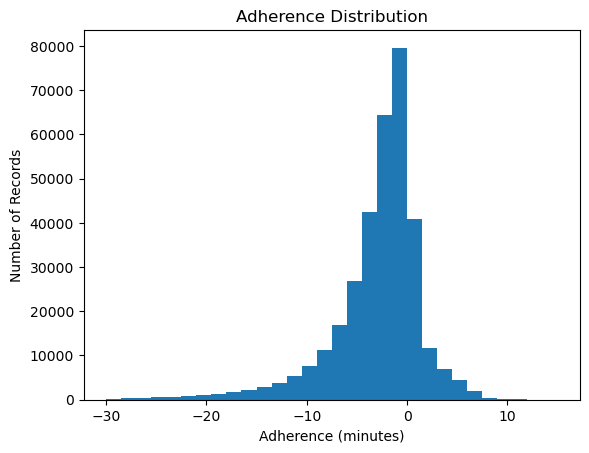

In [35]:
#Filter adherence values to range
adherence_values = wego["ADHERENCE"].dropna()
filtered_adherence = adherence_values[(adherence_values > -30) & (adherence_values < 15)]

plt.hist(filtered_adherence, bins=30)
plt.title("Adherence Distribution")
plt.xlabel("Adherence (minutes)")
plt.ylabel("Number of Records")
plt.show()



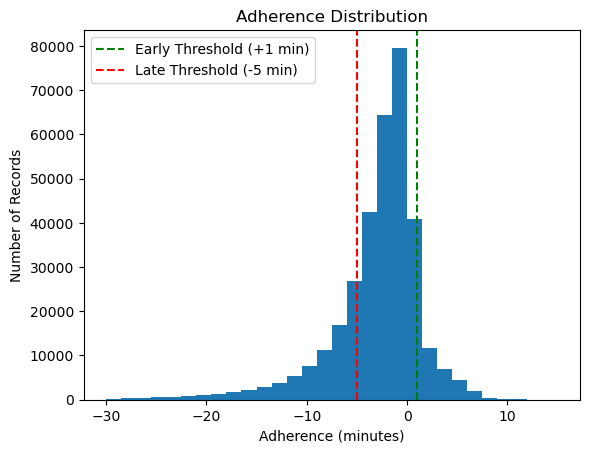

In [37]:
#Filter adherence to a reasonable range
filtered_adherence = adherence_values[(adherence_values > -30) & (adherence_values < 15)]

# Plot the histogram
plt.hist(filtered_adherence, bins=30)
plt.title("Adherence Distribution")
plt.xlabel("Adherence (minutes)")
plt.ylabel("Number of Records")

#Threshold
plt.axvline(x=1, color='green', linestyle='--', label='Early Threshold (+1 min)')
plt.axvline(x=-5, color='red', linestyle='--', label='Late Threshold (-5 min)')
plt.legend()

plt.show()


In [39]:
wego["ROUTE_DIRECTION_NAME"].unique()
wego["ROUTE_DIRECTION_NAME"].value_counts()

ROUTE_DIRECTION_NAME
FROM DOWNTOWN    185793
TO DOWNTOWN      164536
Name: count, dtype: int64

In [41]:
#Group by direction and sum counts
direction = wego.groupby("ROUTE_DIRECTION_NAME")[["ADJUSTED_EARLY_COUNT", "ADJUSTED_LATE_COUNT", "ADJUSTED_ONTIME_COUNT"]].sum()

# Calculate percent performance
direction["Total"] = direction.sum(axis=1)
direction["% On Time"] = direction["ADJUSTED_ONTIME_COUNT"] / direction["Total"] * 100
direction["% Late"] = direction["ADJUSTED_LATE_COUNT"] / direction["Total"] * 100
direction["% Early"] = direction["ADJUSTED_EARLY_COUNT"] / direction["Total"] * 100

# Display the result
direction[["% On Time", "% Late", "% Early"]]

,% On Time,% Late,% Early
ROUTE_DIRECTION_NAME,,,
FROM DOWNTOWN,74.963470,22.085708,2.950822
TO DOWNTOWN,85.007678,12.182006,2.810316


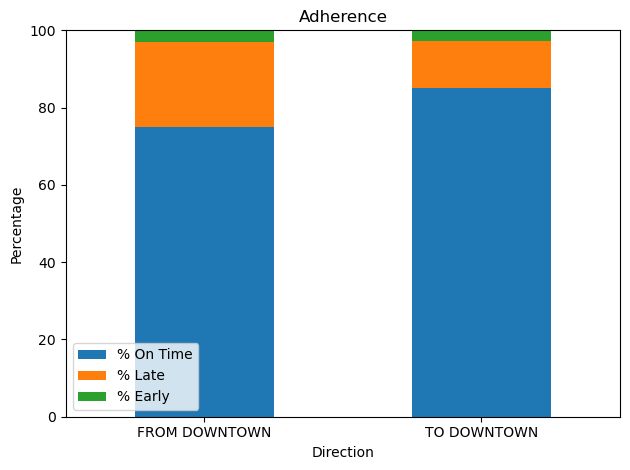

In [43]:
#Stacked bar
plot_data = direction[["% On Time", "% Late", "% Early"]]

plot_data.plot(kind="bar", stacked=True)
plt.title("Adherence")
plt.ylabel("Percentage")
plt.xlabel("Direction")
plt.legend(loc="lower left")
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

In [45]:
#Round lat/log to 4 decimals for grouping
wego["LAT_ROUND"] = wego["LATITUDE"].round(4)
wego["LON_ROUND"] = wego["LONGITUDE"].round(4)

In [47]:
#Group by location
location = wego.groupby(["LAT_ROUND", "LON_ROUND"])[["ADJUSTED_EARLY_COUNT", "ADJUSTED_LATE_COUNT", "ADJUSTED_ONTIME_COUNT"]].sum()

#Totals and percentages
location["Total"] = location.sum(axis=1)
location["% On Time"] = location["ADJUSTED_ONTIME_COUNT"] / location["Total"] * 100
location["% Late"] = location["ADJUSTED_LATE_COUNT"] / location["Total"] * 100
location["% Early"] = location["ADJUSTED_EARLY_COUNT"] / location["Total"] * 100

location = location.reset_index()

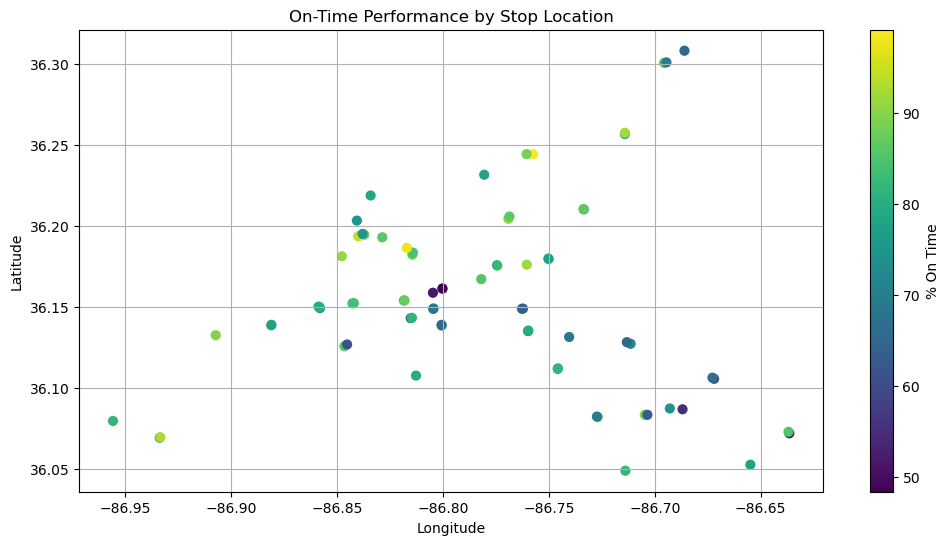

In [49]:
#Lat/Log Scatter Plot
plt.figure(figsize=(12, 6))
plt.scatter(
    location["LON_ROUND"], 
    location["LAT_ROUND"], 
    c=location["% On Time"], 
    cmap="viridis", 
    s=40
)
plt.colorbar(label="% On Time")
plt.title("On-Time Performance by Stop Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

In [51]:
#Base map
stops = folium.Map(location=[36.1627, -86.7816], zoom_start=11)

#Bus Stops
for _, row in location.iterrows():
    location = [row["LAT_ROUND"], row["LON_ROUND"]]
    popup_text = f"""
    % On Time: {row['% On Time']:.1f}%<br>
    % Late: {row['% Late']:.1f}%<br>
    % Early: {row['% Early']:.1f}%
    """
    color = "green" if row["% On Time"] > 85 else "orange" if row["% On Time"] > 70 else "red"
    
    folium.CircleMarker(
        location=location,
        radius=4,
        popup=folium.Popup(popup_text, max_width=200),
        color=color,
        fill=True,
        fill_opacity=0.7
    ).add_to(stops)

#Legend
legend_html = """
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    z-index: 9999;
    background-color: white;
    border: 2px solid gray;
    padding: 10px;
    box-shadow: 2px 2px 6px rgba(0,0,0,0.3);
    font-size: 14px;
">
<strong>On-Time Performance</strong><br>
<span style="color: green;">&#9679;</span> > 85% On Time<br>
<span style="color: orange;">&#9679;</span> 70–85% On Time<br>
<span style="color: red;">&#9679;</span> < 70% On Time
</div>
"""
stops.get_root().html.add_child(Element(legend_html))

stops

In [53]:
#Save map to HTML file
stops.save("wego_bus_stop_map.html")

In [55]:
#Convert DATE to datetime format
wego["DATE"] = pd.to_datetime(wego["DATE"])

#Extract weekday
wego["WEEKDAY"] = wego["DATE"].dt.day_name()

#Convert ACTUAL_DEPARTURE_TIME to datetime, then extract hour
wego["ACTUAL_DEPARTURE_TIME"] = pd.to_datetime(wego["ACTUAL_DEPARTURE_TIME"], errors="coerce")
wego["HOUR"] = wego["ACTUAL_DEPARTURE_TIME"].dt.hour

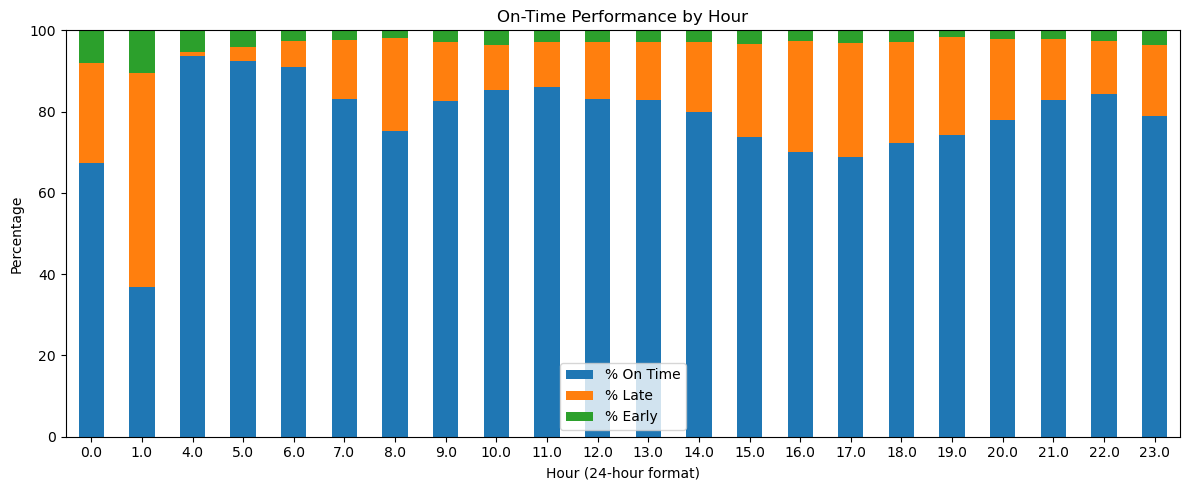

In [57]:
#Group by hour
hourly = wego.groupby("HOUR")[["ADJUSTED_EARLY_COUNT", "ADJUSTED_LATE_COUNT", "ADJUSTED_ONTIME_COUNT"]].sum()

#Total and percent performance
hourly["Total"] = hourly.sum(axis=1)
hourly["% On Time"] = hourly["ADJUSTED_ONTIME_COUNT"] / hourly["Total"] * 100
hourly["% Late"] = hourly["ADJUSTED_LATE_COUNT"] / hourly["Total"] * 100
hourly["% Early"] = hourly["ADJUSTED_EARLY_COUNT"] / hourly["Total"] * 100

#Plot
hourly[["% On Time", "% Late", "% Early"]].plot(kind="bar", stacked=True, figsize=(12, 5))
plt.title("On-Time Performance by Hour")
plt.xlabel("Hour (24-hour format)")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

In [59]:
wego["HOUR"].value_counts().sort_index()

HOUR
0.0      4309
1.0       209
4.0      1697
5.0      9964
6.0     18822
7.0     21414
8.0     21048
9.0     20410
10.0    20103
11.0    19794
12.0    20124
13.0    20028
14.0    20263
15.0    21515
16.0    21687
17.0    21169
18.0    17718
19.0    13650
20.0    12516
21.0    11914
22.0    11252
23.0     9255
Name: count, dtype: int64

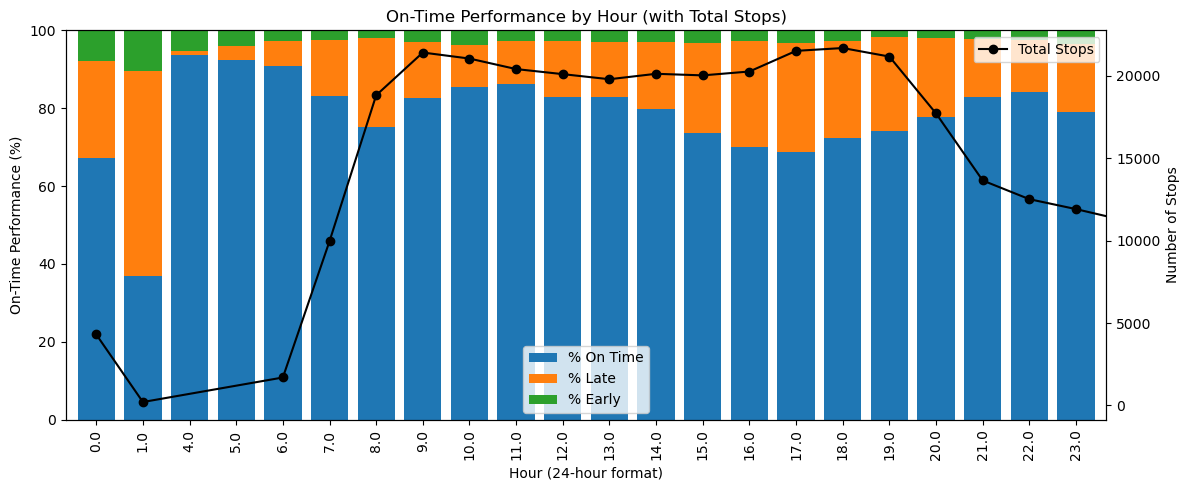

In [61]:
fig, ax1 = plt.subplots(figsize=(12, 5))

#Stacked bars for % performance
hourly[["% On Time", "% Late", "% Early"]].plot(kind="bar", stacked=True, ax=ax1, width=0.8)
ax1.set_ylabel("On-Time Performance (%)")
ax1.set_ylim(0, 100)
ax1.legend(loc="lower center")
ax1.set_xlabel("Hour (24-hour format)")

#Second y-axis for number of stops
ax2 = ax1.twinx()
ax2.plot(hourly["Total"], color="black", marker="o", label="Total Stops")
ax2.set_ylabel("Number of Stops")
ax2.legend(loc="upper right")

plt.title("On-Time Performance by Hour (with Total Stops)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [63]:
wego["OPERATOR"].nunique()
wego["OPERATOR"].value_counts()

OPERATOR
2352    2970
1266    2911
1147    2710
1133    2625
2424    2577
        ... 
2256       6
56         3
473        2
0          1
656        1
Name: count, Length: 341, dtype: int64

In [65]:
#Group by operator
operator = wego.groupby("OPERATOR")[["ADJUSTED_EARLY_COUNT", "ADJUSTED_LATE_COUNT", "ADJUSTED_ONTIME_COUNT"]].sum()

#Totals and percentages
operator["Total"] = operator.sum(axis=1)
operator["% On Time"] = operator["ADJUSTED_ONTIME_COUNT"] / operator["Total"] * 100
operator["% Late"] = operator["ADJUSTED_LATE_COUNT"] / operator["Total"] * 100
operator["% Early"] = operator["ADJUSTED_EARLY_COUNT"] / operator["Total"] * 100

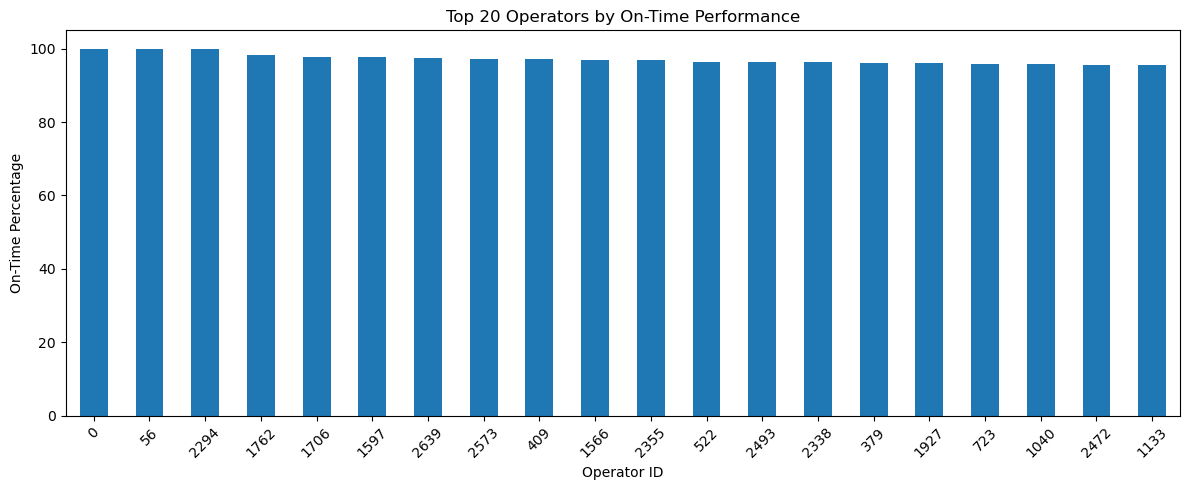

In [67]:
# Sort by % on-time
sorted_perf = operator.sort_values("% On Time", ascending=False)

#Top 20 drivers by % on-time
sorted_perf["% On Time"].head(20).plot(kind="bar", figsize=(12, 5))
plt.title("Top 20 Operators by On-Time Performance")
plt.xlabel("Operator ID")
plt.ylabel("On-Time Percentage")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [69]:
#Sort by % on-time
top_20_ops = operator.sort_values("% On Time", ascending=False).head(20)
bottom_20_ops = operator.sort_values("% On Time").head(20)

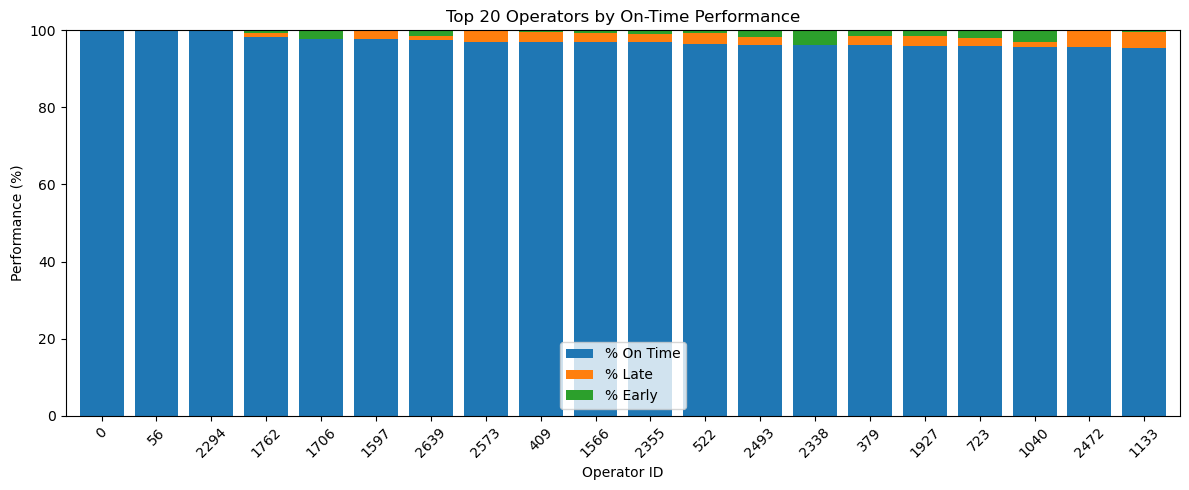

In [71]:
#Top 20 operators
top_20_ops[["% On Time", "% Late", "% Early"]].plot(
    kind="bar", stacked=True, figsize=(12, 5), width=0.8
)
plt.title("Top 20 Operators by On-Time Performance")
plt.xlabel("Operator ID")
plt.ylabel("Performance (%)")
plt.legend(loc="lower center")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

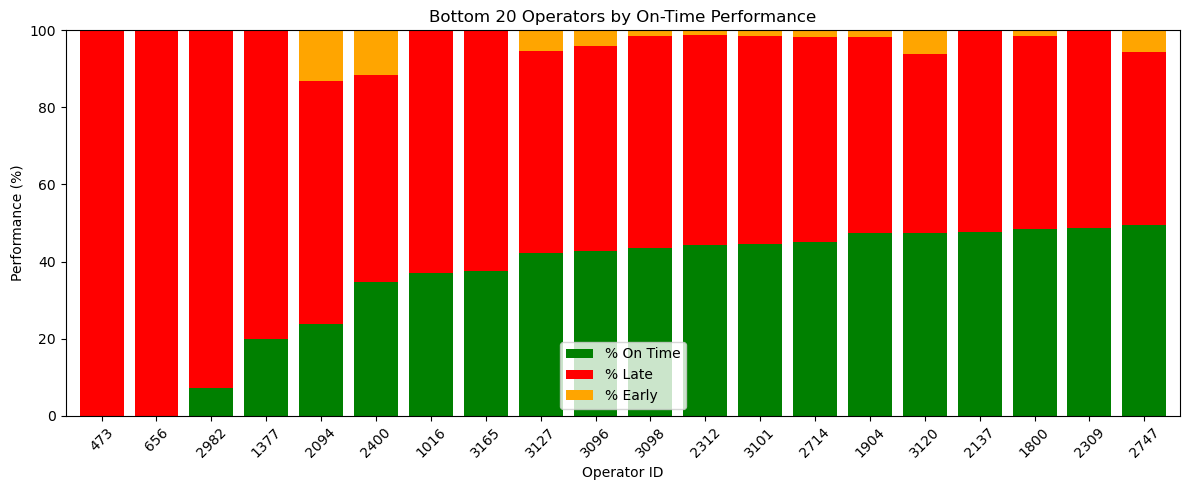

In [73]:
#Botton 20 operators
bottom_20_ops[["% On Time", "% Late", "% Early"]].plot(
    kind="bar", stacked=True, figsize=(12, 5), width=0.8, color=["green", "red", "orange"]
)
plt.title("Bottom 20 Operators by On-Time Performance")
plt.xlabel("Operator ID")
plt.ylabel("Performance (%)")
plt.legend(loc="lower center")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

In [75]:
#Drop rows with missing adherence or headway
adherence_vs_headway = wego[["ADHERENCE", "HDWY_DEV", "SCHEDULED_HDWY"]].dropna()

In [77]:
#Add deviation percentage
adherence_vs_headway = adherence_vs_headway[adherence_vs_headway["SCHEDULED_HDWY"] != 0]
adherence_vs_headway["HDWY_DEV_PCT"] = adherence_vs_headway["HDWY_DEV"] / adherence_vs_headway["SCHEDULED_HDWY"]

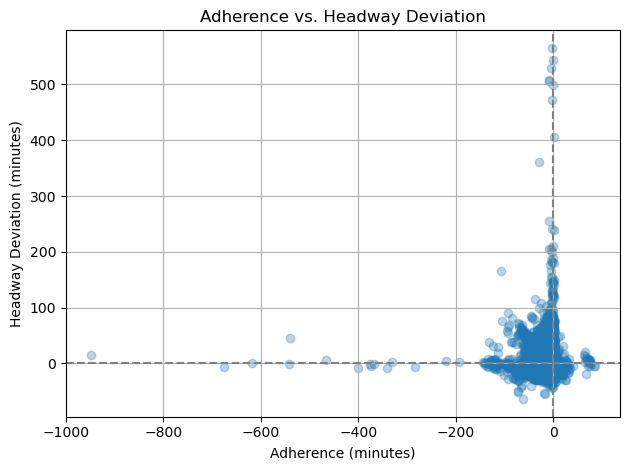

In [79]:
plt.figure()
plt.scatter(adherence_vs_headway["ADHERENCE"], adherence_vs_headway["HDWY_DEV"], alpha=0.3)
plt.title("Adherence vs. Headway Deviation")
plt.xlabel("Adherence (minutes)")
plt.ylabel("Headway Deviation (minutes)")
plt.axhline(0, color="gray", linestyle="--")
plt.axvline(0, color="gray", linestyle="--")
plt.grid(True)
plt.tight_layout()
plt.show()

In [81]:
correlation = adherence_vs_headway[["ADHERENCE", "HDWY_DEV"]].corr()
correlation

,ADHERENCE,HDWY_DEV
ADHERENCE,1.000000,-0.206771
HDWY_DEV,-0.206771,1.000000


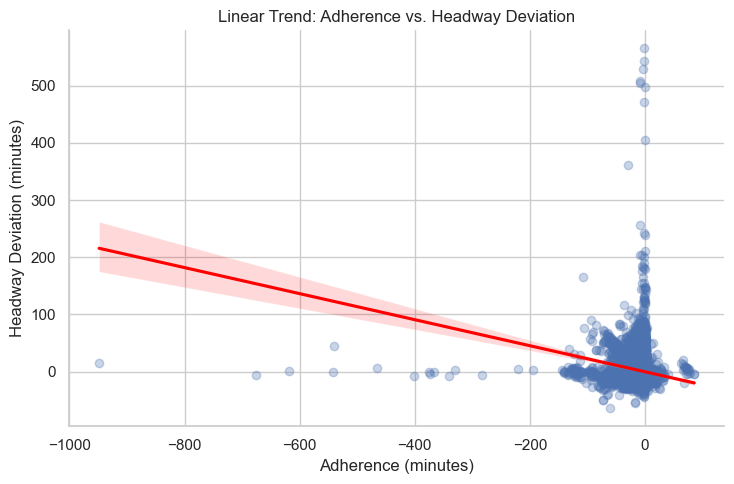

In [83]:
sns.set(style="whitegrid")
sns.lmplot(
    x="ADHERENCE",
    y="HDWY_DEV",
    data=adherence_vs_headway,
    scatter_kws={"alpha": 0.3},
    height=5,
    aspect=1.5,
    line_kws={"color": "red"}
)
plt.title("Linear Trend: Adherence vs. Headway Deviation")
plt.xlabel("Adherence (minutes)")
plt.ylabel("Headway Deviation (minutes)")
plt.tight_layout()

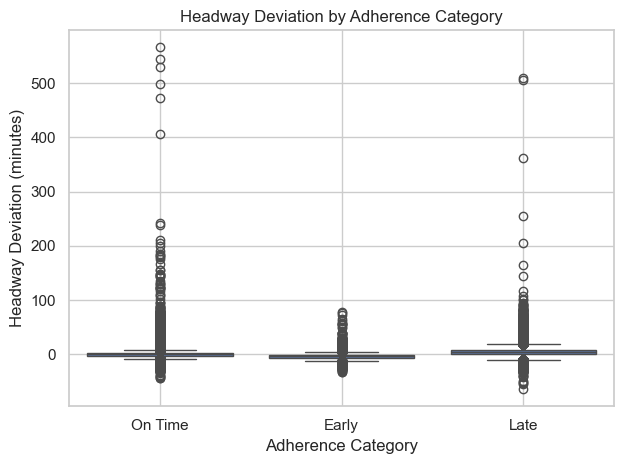

In [86]:
#Create categories
def categorize_adherence(x):
    if x > 1:
        return "Early"
    elif x < -6:
        return "Late"
    else:
        return "On Time"

adherence_vs_headway["Adherence_Category"] = adherence_vs_headway["ADHERENCE"].apply(categorize_adherence)

#Boxplot
plt.figure()
sns.boxplot(x="Adherence_Category", y="HDWY_DEV", data=adherence_vs_headway)
plt.title("Headway Deviation by Adherence Category")
plt.xlabel("Adherence Category")
plt.ylabel("Headway Deviation (minutes)")
plt.grid(True)
plt.tight_layout()
plt.show()